
# Project: Investigate The Movie Database (TMDb) 

### By Abdelhamid Tebba

## Introduction

In this project I have explored a dataset collected from The Movie Database (TMDb). This dataset contains information about 10.865 movies released between 1960 and 2015.  The information provided, which are arranged in 21 columns, include, inter alia, the title of the movie, the year it was released, the popularity, the average vote, the genre, the budget and the amount of money made. 

My intent was to analyse the patterns of **the revenues made in the film industry** on the basis of multiple variables. In this regard, I attempted to answer the following questions: 
>- Is there any relation between the budget and the amount of money earned?
>- How much does a movie gross on average depending on viewers' satisfaction?
>- How does the average grossing vary depending on the diversity of movies in terms of genres? 

#### Table of Contents:
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
##  Step 1. Data Wrangling



### 1. General Properties:###

In [4]:
# Loading the 5 fisrt rows of our dataset
mdb = pd.read_csv(r'E:\NAND\project_2\tmdb.csv')
mdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [6]:
mdb.shape

(10866, 21)

The dataset contains 10866 rows and 21 columns.  

In [7]:
# The periods covered in our dataset
year= mdb['release_year'].unique()
year.sort()
print (year)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [8]:
#The details provided about movies in this dataset:
mdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Some of the column names above need to be clarified. These are as follows:<br>
- 'tagline' is a short phrase that sums up  the tone and premise of an audio/visual product, generally used in marketing (source of the definition: Wikipedia in https://en.wikipedia.org/wiki/Tagline)
- 'overview' is the movie synopsis
- 'runtime' is the duration of the movie expressed in minutes 
- 'revenue_adj' and 'budget_adj' represent the inflation-adjusted values of 'revenues' and 'budget' respectively, based on the 2010 dollars 
    

In [9]:
# Missing values and data types:
mdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
mdb.isnull().sum().sum() 

13434

The dataset contains 13434 missing values from 9 columns.

In [11]:
#Duplicated values in the dataset:
mdb[mdb.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


There is one duplicated row corresponding to the movie "Tekken

In [12]:
#Statistic desciption of the numeric variables:

mdb.describe(include= [np.number])

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The min value and the max value of the 'runtime' variable seem to be abnormal as it is a 0 value, which is impossible for a movie. Same for the min value of the budget and the revenue. 

In [13]:
#Counting the "0" abnormal values in our dataset:
abnormal_minduration = mdb.query('runtime == "0"').original_title.count()
abnormal_maxduration = mdb.query('runtime == "900"').original_title.count()
abnormal_minrevenue = mdb.query('revenue == "0"').original_title.count()
abnormal_minbudget = mdb.query('budget == "0"').original_title.count()
print ('There are' + ' ' + '{}'.format(abnormal_minduration ) + ' ' + 'movies with a duration of 0 minute' + ' ' + 'and'+ ' '+ '{}'.format(abnormal_maxduration) + ' '+ 'movie with a duration of 900 minutes' + '.' + ' ' + 'There are' + ' ' + '{}'.format(abnormal_minrevenue) + ' ' + 'that has earned nothing' + ' ' + 'and' + ' ' + '{}'.format(abnormal_minbudget) + ' ' + 'that has costed nothting')

There are 31 movies with a duration of 0 minute and 1 movie with a duration of 900 minutes. There are 6016 that has earned nothing and 5696 that has costed nothting


In [14]:
#Crossing the rows that have a 0 value in the 'revenue' column or in the 'budget' column
abnormal_revenue_budget = mdb.query('revenue == "0" or budget =="0"')
abnormal_revenue_budget.loc[:, ('original_title', 'revenue', 'budget')]

,original_title,revenue,budget
30,Mr. Holmes,29355203,0
36,Solace,22354572,0
48,Wild Card,0,30000000
67,Survivor,0,20000000
72,Beyond the Reach,45895,0
...,...,...,...
10861,The Endless Summer,0,0
10862,Grand Prix,0,0
10863,Beregis Avtomobilya,0,0
10864,"What's Up, Tiger Lily?",0,0


We have 7011 movies that either have 0 dollar revenue or 0 dollar budget. This abnormal values must be treated since I will use these variables in my analysis. There are several options to handle them that I will dicuss below in the conclusion of this first section.
<br> It is important to check up the distribution of our targeted variables:

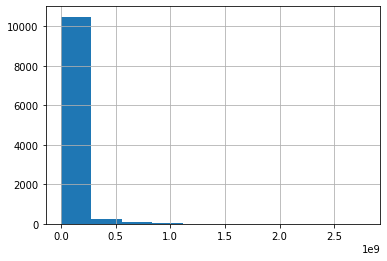

In [15]:
#Distribution of the variable 'revenue'
mdb.revenue.hist();

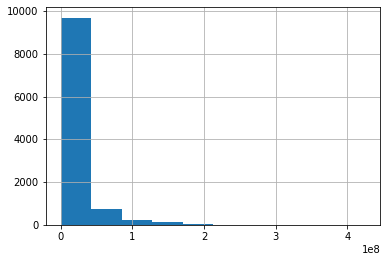

In [16]:
#Distribution of the variable 'budget'
mdb.budget.hist();

Both  variables "revenue" and "budget" are right-sekewed

**The previous statements intend to introduce our dataset, particularly the years covered, the kind of information provided by our dataset, the types of data, missing values and duplicated rows.<br>
The following conclusions can be drawn from this first examination:**<br>
- The dataset is arranged in 21 columns and 10866 rows
- There are 13434 missing values from 9 variables ("imdb_id", "cast", "director", "tagline", keywords", "genres", "production companies")
- There is one duplicated row corresponding to the movie "Tekken" 
- It seems there is no problem with the data types as all the numerical variables are of type integer or float and the categorical variables are of type string
- The average cost of producing a movie is 17.5 Million USD wheras the average revenue is 51.3 Million USD (inflation-adjusted)
- The dataset contains some abnormal values marked as "0" in the runtime, budget  and revenue columns
- The variables "budget" and "revenue" are right-sekewed

>**As stated in the introduction, the dataset contains many information about the movies realesed between 1960 and 2015. However, with regard to the questions we are willing to answer, some details won't be very useful. These include "homepage", "keywords", "tagline" and "overview". Therefore, we will drop them from this dataset so as to reduce the number of columns and make the table better viewable for the reader.<br><br>
>In addition, the dataset has two columns to indicate when the movies were released. The fisrt column "release_date" indicate, in a datetime format, the exact day the movies were released, while the second column "release_year" indicate, as suggested by the name, the year of release. We will keep only the latter to make it simple. <br><br>
>As for the missing values, they are all string data so I can't make any statistical attribution to handle them. Also, I can't drop them  as I will need some non-null variables in the corresponding rows. However, I will remove the missing values in 'genres' in due time as I will need this variable in my last question.<br><br>
>Regarding the abnormal "0" values, there are several options to handle them as I said before. One of these options is to impute these values with the mean, but I don't think it is the best move since there can be so much difference between the budgets and revenues of the movies that the mean wouldn't suit our purpose. The second option is to make a log transformation. This second option will be helpful for the first question only as I will be visualizing the relation between the revenues and the budgets, and having a normal distribution will help absorb the outliers and make our visualization look better, but after performing this opreration separately, I surprisingly found that the distribution has become left sekewed, which is not very helpful in this case. Finally, remain the third option which is to remove all 0 values from these two variables. This will probably let us lose many data but I think it is the best option since the related variables are relevant to the analysis of the above-mentioned questions.**


### 2. Data Cleaning:

*2.1. Duplicated variables*

In [17]:
#Drop the dupliated variables:
mdb.drop_duplicates(inplace=True)
mdb[mdb.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


*2.2. Irrelevant variables:*

In [18]:
# Remove irrelevant columns:
# I will remove these columns in a new dataframe so as to keep the original dataset intact in case I need it for any possible analysis
mdb.drop(['homepage', 'keywords', 'tagline', 'overview', 'release_date'], axis=1, inplace=True)
mdb.head(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj


*C. Treating abnormal values:*

In [19]:
# I will remove the 0 values from the columns 'revenue' and 'budget'. 
#This will automatically remove any 0 value from the corresponding inflation-adjusted columns (although I will not use them)

#For the 1st question: create a new DF where the rows containg 0 values in the revenue or the budget columns are removed
mdb2 = mdb.drop(mdb[np.logical_or(mdb.revenue == 0, mdb.budget ==0)].index)
mdb2.shape

(3854, 16)

In [20]:
#For the 2d and 3d questions: create a new DF where only the rows containg 0 values in the revenue are removed
mdb3 = mdb.drop(mdb[mdb.revenue == 0].index)
mdb3.shape

(4849, 16)

More than the half of our dataset was lost. But 3854 observations (or 4849) is still a very good size so as to examine our questions.

<a id='eda'></a>
## Step 2. Exploratory Data Analysis



###  1.  Is there any relation between the budget  and the amount of money earned?

In the next steps I am going to analyse the relation between the variables "budget" and "revenue"

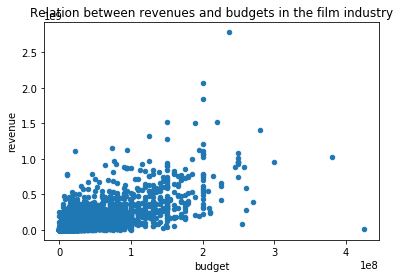

In [21]:
#First, let's vizualize the relation between the targeted variables using a scatter plot

mdb2.plot(x='budget', y='revenue', kind='scatter', title='Relation between revenues and budgets in the film industry');

It seems that the revenues earned  and the costs of the movies are slighly correlated. but as both  variables are extremely right-skewed, it is difficult to draw any final conclusion from the above scatter-plot. It will propbably give more insight if a correlation coeffcient is calculated. 

In [22]:
#Now let's calculate the Prearson correlation coefficient using the function corr()
mdb2['budget'].corr(mdb2['revenue'], method='pearson')

0.6885561524636744

Across the movies released between 1960 and 2015, there is a 0.6885 correlation between the budget of a movie and the amount of money it has made. This degree of correlation provide enough evidence of the positive relationship between the revenue and the cost of the movies, although it would be more convenient to dig deeper due to the outliers in this dataset. This is not the purpose of this first exploratory analysis. 

As a second step I will segment the dataset on three categories based on the vote average, which I think is a suitable variable, in order to see  the variation of movies' grossings on the basis of the level of satisfaction. This leads us to the second question of this analysis, which is:

### 2. How much does a movie gross on average depending on viewers' satisfaction?

In order to answer this question, we need to determine the levels of satisfaction based on the 'vote_average'. The first step is to define the boundaries of our bins as well as their labels that will segment our values.

In [27]:
#The boundaries of our bins wil be the quantiles of vote_average values:
#I will be using the mdb3 dataset where, as I already mentioned, only the rows containg 0 values in the revenue are revmoved  

mdb3['vote_average'].describe()
bin_bounds =[2.2, 5.7, 6.7, 8.4]
#The above bin_bounds correspond to the min, 25%, 75% and max
bin_labels= ['low', 'modest', 'high']
mdb3['viewers_satisfaction'] = pd.cut(mdb3['vote_average'], bin_bounds, labels= bin_labels )
mdb3.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,viewers_satisfaction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09,modest
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08,high
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955.5,2.716190e+08,modest


The second step is to see the average grossing for each level of satiscation

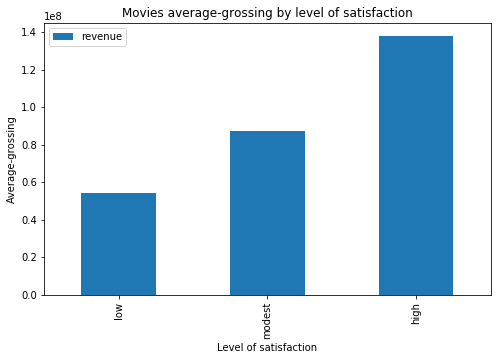

In [28]:
# The average grossing for each level of satiscation
df=mdb3.groupby('viewers_satisfaction', as_index=False)['revenue'].mean()
df.plot.bar(figsize=(8,5))
plt.title('Movies average-grossing by level of satisfaction')
plt.xticks(np.arange(3), df.viewers_satisfaction)
plt.xlabel('Level of satisfaction')
plt.ylabel('Average-grossing');

In [29]:
df

,viewers_satisfaction,revenue
0,low,5.422060e+07
1,modest,8.745153e+07
2,high,1.380455e+08


Top rated movies by voters gross on average more than low rated and modest rated movies.

Now it is time to tackle our third question which will give us more information about the revenues made by movies.

### 3. How does the average grossing vary depending on the diversity of movies in term of genres?

For this thirs question, we will evaluate the diversity of a movie by how many genres it can be cotegorized in. The 'genres' columns classifies the movies in many genres. Some movies  can be of one genre like Horror for example and others can be of many genres.

In [22]:
#Drop the null values in the 'genres' column 
#Create a column that sums up the number of genres for each movie and
#groupby this column the average revenue 

mdb3.dropna(subset=['genres'], inplace=True)
mdb3['numb_genres'] = [len(x.split('|')) for x in mdb3['genres'].tolist()]
df1= mdb3.groupby('numb_genres', as_index=False)['revenue'].mean()
df1

,numb_genres,revenue
0,1,5.211025e+07
1,2,6.493353e+07
2,3,1.099118e+08
3,4,1.231417e+08
4,5,1.300734e+08


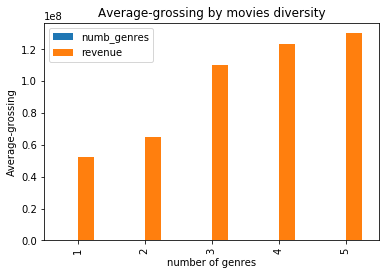

In [23]:
#Plot the graph to see how the average grossings variate depending on the diversity of movies in term of genres
df1.plot.bar()
plt.title('Average-grossing by movies diversity')
plt.xticks(np.arange(5), df1.numb_genres)
plt.xlabel('number of genres')
plt.ylabel('Average-grossing');

From the above graph, it seems that the movies containing more genres are the ones that make high revenues on average. 

<a id='conclusions'></a>
## Conclusions

This project is not meant to give a final conclusion on the determinants of revenues or the causality between variables in the film industry as this would require a profound analysis using other tools. However, the purpose of this project is to provide useful information that, I hope, would pave the way for a thorough study of the questions stated above. 

The questions outilned in this project intend to explore how the revenues made by movies change depending on different variables, like the budget, the rating and the diversity.

During the data wrangling process, I have examined the structure of this dataset and see how it can help me answer my questions. I  also looked for any inconsistencies that will likely hinder my analysis. I  found many 0 values I had to deal with, not very much duplicated rows (only one) and some missing values.  

The EDA performed gave me a first insight on the revenue variable and how it changes. The main findings following this exploratory analysis can be sumerrized as follows:
- The cost of a movie and the amount of money it made are related, according to the positive  correlation of 0.69. The scatter plot gives a first idea about this relationship. This relation can be confirmed deeply by conducting a regression analysis.
- Low rated movies, according to the average vote of viewers,  are the lowest-grossing compared to modestly rated movies (53 million dollars on average). And high rated movies are the highest grossing movies compared to the other satisfaction levels (nearly 140 million dollars on average).
- As the number of genres defining a movie increases the average revenue increases. Movies having indentified in 5 genres gross on average 130 million dollars, while the movies identified in one genre make on average 52 million dollars.